# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm


In [2]:
# Load datasets
sales = pd.read_csv('../dataset/sales_train_validation.csv')
calendar = pd.read_csv('../dataset/calendar.csv')
prices = pd.read_csv('../dataset/sell_prices.csv')
evaluation = pd.read_csv('../dataset/sales_train_evaluation.csv')

# EDA Analysis

## Dataset Overview

In [3]:
# Display shapes and first few rows
print(f"sales dataset shape: {sales.shape}")
sales.head()

sales dataset shape: (30490, 1919)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [4]:
print(f"Calendar Datset Shape: {calendar.shape}")
calendar.head()

Calendar Datset Shape: (1969, 14)


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [5]:
print(f"prices dataset Shape: {prices.shape}")
prices.head()

prices dataset Shape: (6841121, 4)


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [6]:
print(f"evaluation dataset shape: {evaluation.shape}")
evaluation.head()

evaluation dataset shape: (30490, 1947)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


## Missing Values Analysis

In [7]:
missing_values = {
    "sales_missing": sales.isnull().sum().sum(),
    "calendar_missing": calendar.isnull().sum().sum(),
    "prices_missing": prices.isnull().sum().sum(),
}

print(missing_values)


{'sales_missing': np.int64(0), 'calendar_missing': np.int64(7542), 'prices_missing': np.int64(0)}


In [8]:
# Fill missing event fields with 'None' for categorical consistency
calendar['event_name_1'] = calendar['event_name_1'].fillna('None')
calendar['event_type_1'] = calendar['event_type_1'].fillna('None')
calendar['event_name_2'] = calendar['event_name_2'].fillna('None')
calendar['event_type_2'] = calendar['event_type_2'].fillna('None')


## Descriptive Statistics and Distributions

Price Mean: 4.410952389235621
Price Skewness: 2.2249962640634275
Price Kurtosis: 8.538394564972153


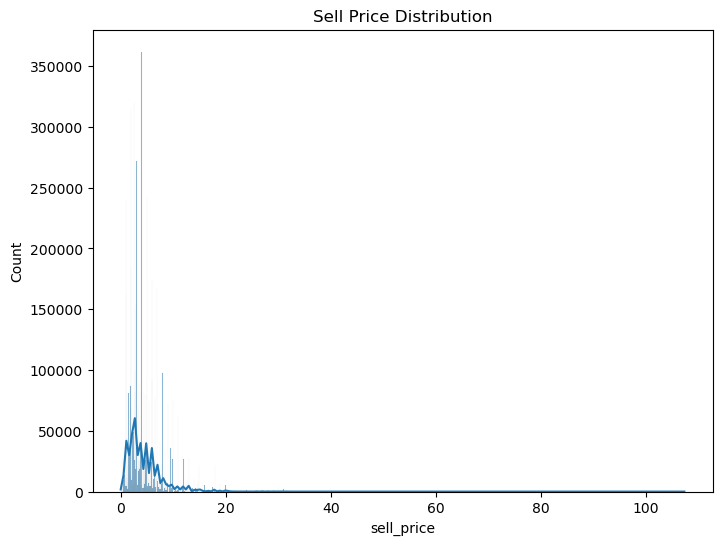

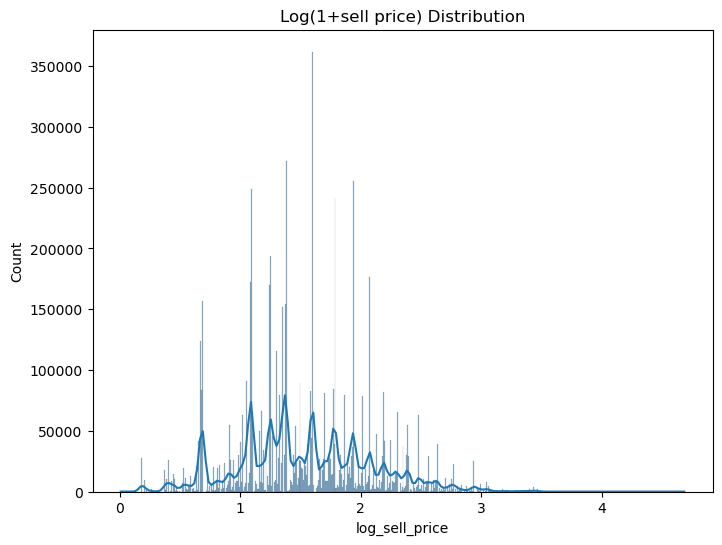

In [9]:
plt.figure(figsize=(8,6))
sns.histplot(prices['sell_price'], kde=True)
plt.title('Sell Price Distribution')

prices['log_sell_price']=np.log1p(prices['sell_price'])
plt.figure(figsize=(8,6))
sns.histplot(prices['log_sell_price'], kde=True)
plt.title('Log(1+sell price) Distribution')

print("Price Mean:", prices['sell_price'].mean())
print("Price Skewness:", skew(prices['sell_price']))
print("Price Kurtosis:", kurtosis(prices['sell_price']))

## Time Features from Calendar

In [10]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['weekday'] = calendar['date'].dt.dayofweek
calendar['month'] = calendar['date'].dt.month
calendar['year'] = calendar['date'].dt.year


## Sales Trends Analysis

Text(0, 0.5, 'Sales Volume')

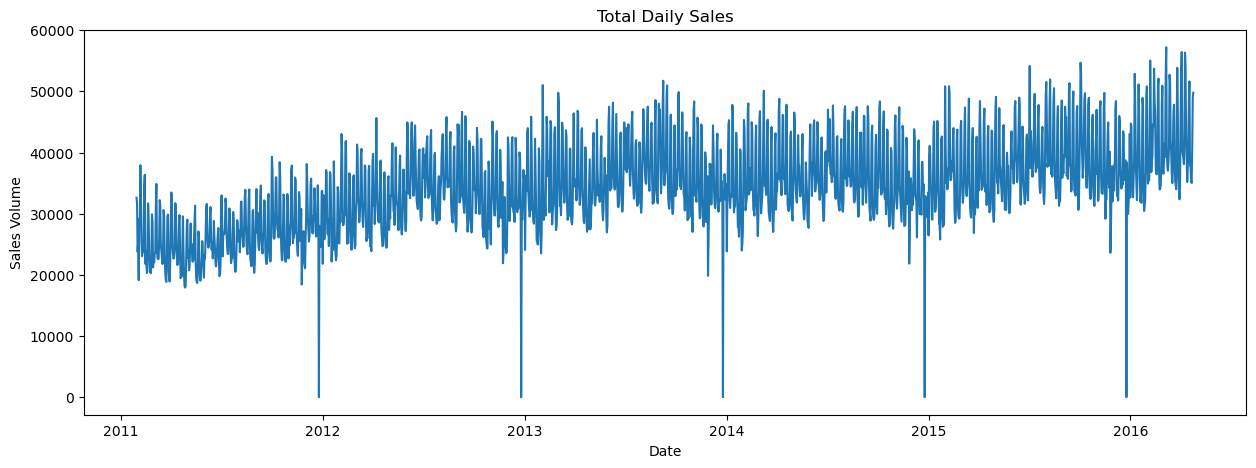

In [11]:
daily_sales = sales.iloc[:,6:].sum(axis=0)
daily_sales.index = pd.date_range(start = '2011-01-29', periods=len(daily_sales), freq='D')

plt.figure(figsize=(15,5))
plt.plot(daily_sales)
plt.title('Total Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales Volume')

## Decomposition of Sales Trends

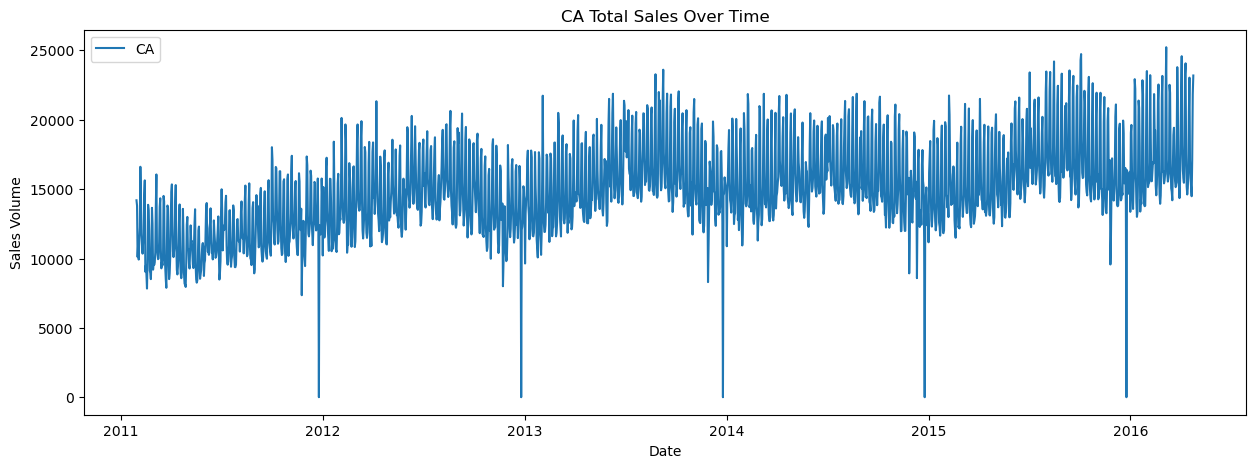

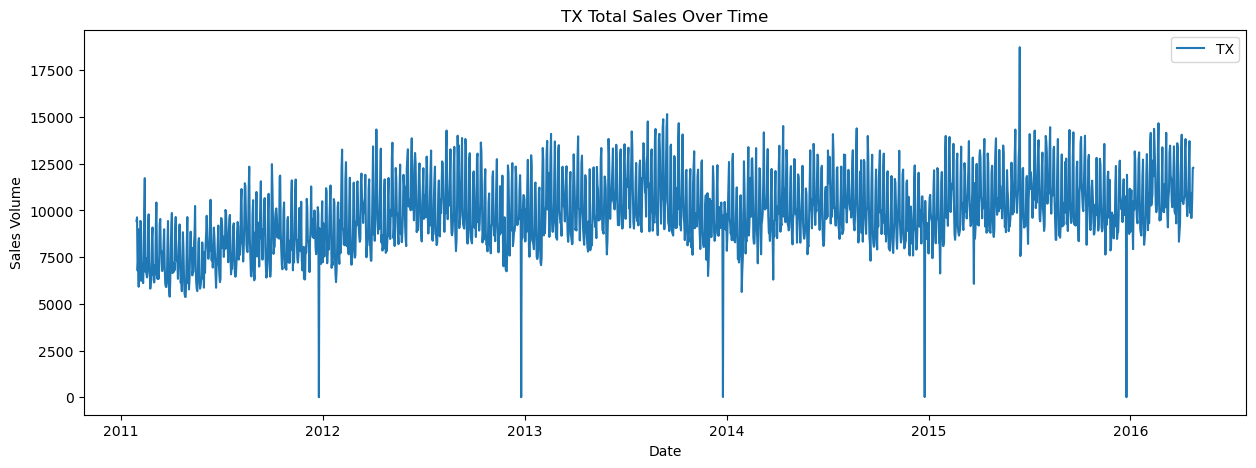

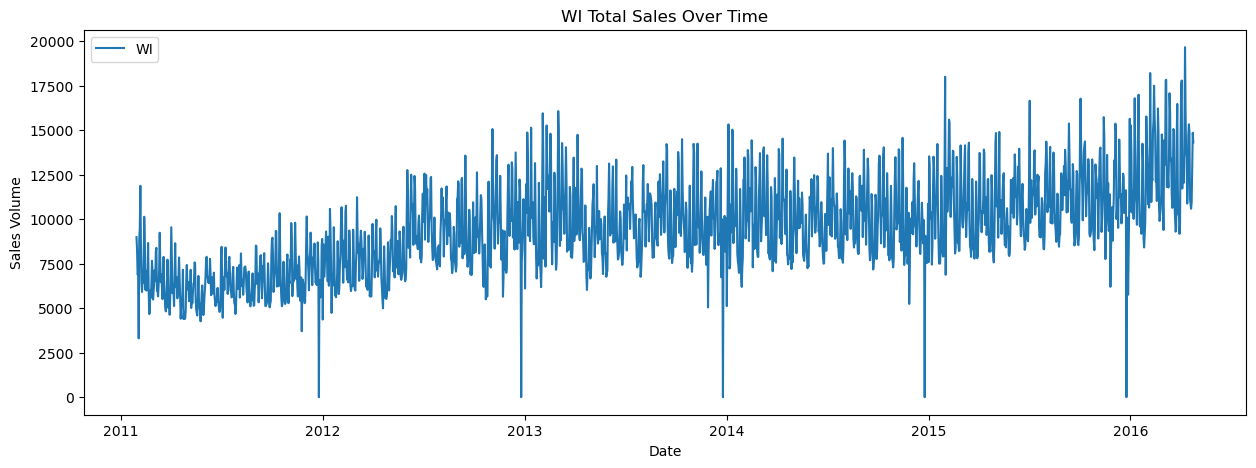

In [12]:
# Transpose and prepare sales data
state_group = sales.groupby("state_id").sum().drop(columns=['id', 'item_id', 'dept_id', 'cat_id', 'store_id']).T

# Map 'd' columns to actual dates
day_to_date = dict(zip(calendar['d'], calendar['date']))
state_group.index = state_group.index.map(day_to_date)
state_group.index = pd.to_datetime(state_group.index)

# Now plot
for state in state_group.columns:
    plt.figure(figsize=(15,5))
    plt.plot(state_group.index, state_group[state], label=state)
    plt.title(f'{state} Total Sales Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sales Volume')
    plt.legend()
    plt.show()


## Autocorrelation Analysis

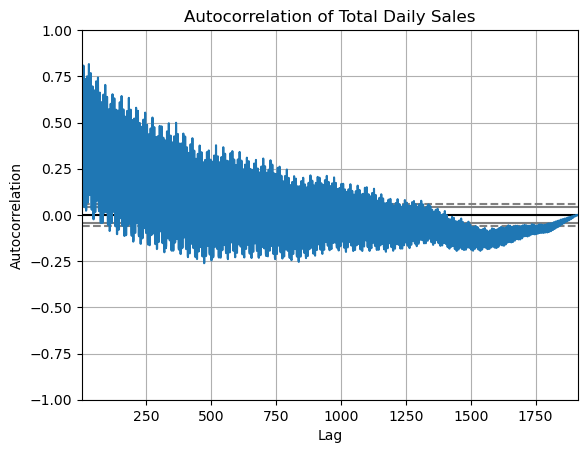

In [13]:
autocorrelation_plot(daily_sales)
plt.title('Autocorrelation of Total Daily Sales')
plt.show()


## Correlation Matrix of sales by store_id

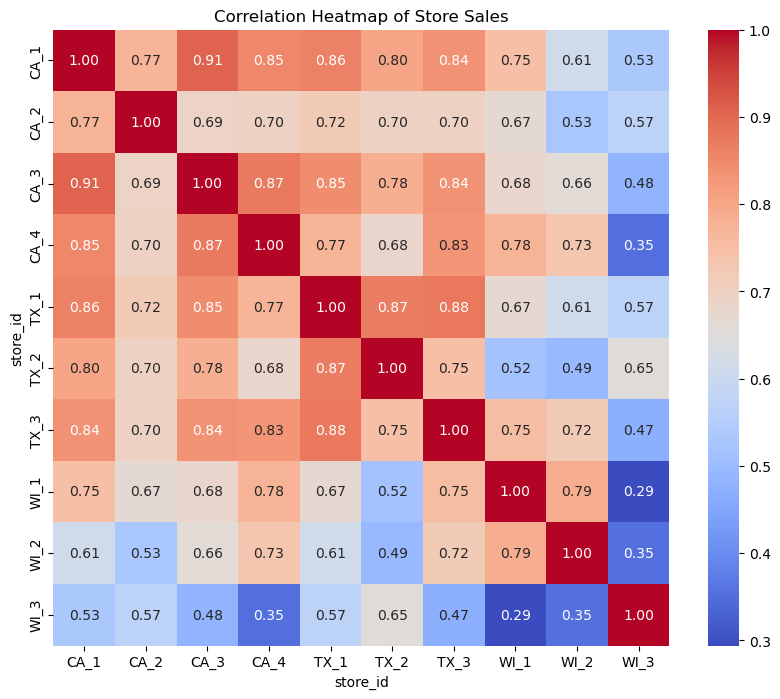

In [14]:
# Aggregate sales by store_id
store_sales = sales.groupby('store_id').sum().iloc[:,6:]
store_sales = store_sales.T

corr_matrix = store_sales.corr()

# plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Store Sales')
plt.show()

## Outlier Detection and Anomalies

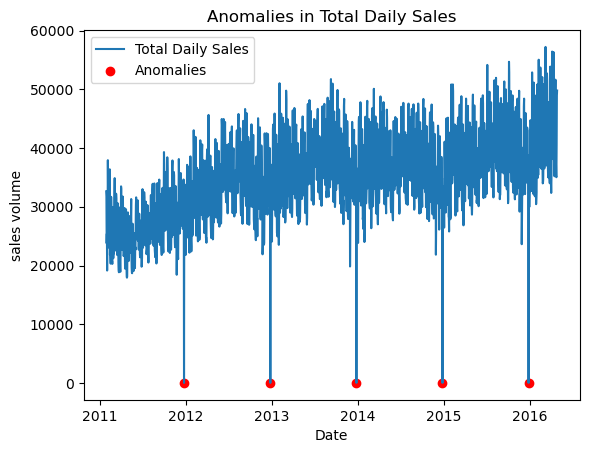

In [15]:
# Sum daily sales
daily_sales = sales.iloc[:,6:].sum(axis=0)
daily_sales.index = pd.date_range(start='2011-01-29', periods=len(daily_sales), freq='D')

# calculate rolling mean and std
rolling_mean = daily_sales.rolling(window=30).mean()
rolling_std = daily_sales.rolling(window=30).std()

# Identify anomalies (Z-score method)
Z_score = (daily_sales - rolling_mean) / rolling_std
anomalies = daily_sales[Z_score.abs() > 3]

# plot anomalies 

plt.Figure(figsize=(12, 10))
plt.plot(daily_sales, label='Total Daily Sales')
plt.scatter(anomalies.index, anomalies, color='red', label='Anomalies')
plt.title('Anomalies in Total Daily Sales')
plt.xlabel('Date')
plt.ylabel('sales volume')
plt.legend()
plt.show()


## SNAP Program Analysis

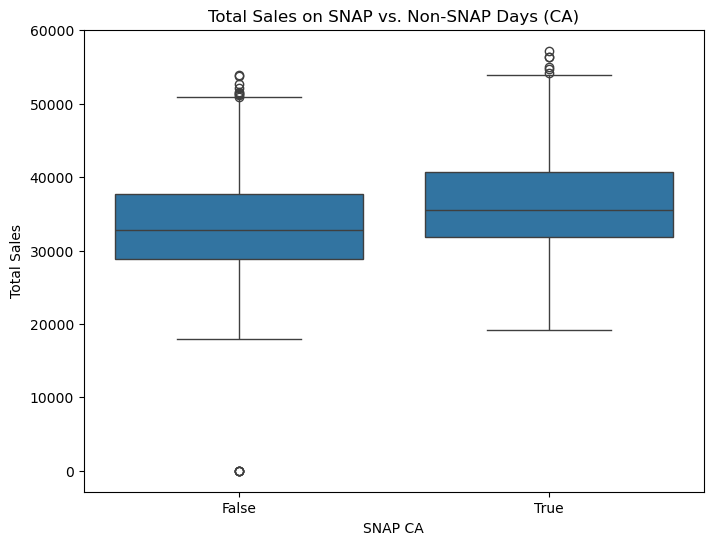

In [16]:
# Merge sales dates with calendar
calendar['date'] = pd.to_datetime(calendar['date'])
snap_cols = ['snap_CA', 'snap_TX', 'snap_WI']
snap_data = calendar[['date'] + snap_cols]

# Sum sales per day
daily_sales_df = pd.DataFrame({'date': daily_sales.index, 'total_sales': daily_sales.values})

# Merge with SNAP info
merged_df = pd.merge(daily_sales_df, snap_data, on='date', how='left')

# Plot boxplots comparing sales on SNAP vs non-SNAP days (for CA as example)
merged_df['is_snap_CA'] = merged_df['snap_CA'].fillna(0).astype(bool)
plt.figure(figsize=(8,6))
sns.boxplot(x='is_snap_CA', y='total_sales', data=merged_df)
plt.title('Total Sales on SNAP vs. Non-SNAP Days (CA)')
plt.xlabel('SNAP CA')
plt.ylabel('Total Sales')
plt.show()


## Advanced Time Series Decomposition (STL)

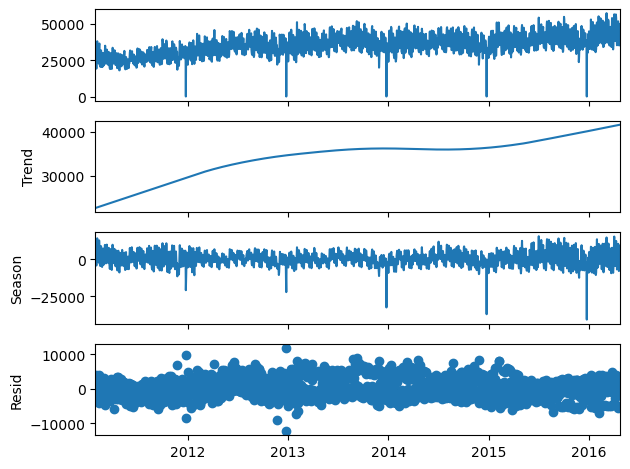

In [17]:
from statsmodels.tsa.seasonal import STL

# STL decomposition on total sales
stl = STL(daily_sales, period=365)
res = stl.fit()

# Plot components
res.plot()
plt.show()